<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/9_Optimizing_Oil_Well_Selection_for_OilyGiant_Mining_Company_A_Data_Driven_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
In the exploration and development of oil wells, it's crucial to employ data-driven approaches to maximize profits while minimizing risks. As a part of the OilyGiant team, tasked with identifying the optimal locations for 200 new oil wells, this project aims to utilize predictive modeling and bootstrapping techniques to assess potential profits and risks across multiple geographical regions.

## Objective:
The main objective of this project is to identify the most profitable region for the development of 200 new oil wells. To achieve this, we will follow a structured approach:
1. Data Preparation: Gather and preprocess data from oil wells in selected regions.
2. Model Training and Validation:
  * Split data into training and validation sets.
  * Train predictive models to estimate oil reserves for each region.
  * Evaluate model performance and analyze predictions.
3. Profit Calculation Preparation:
  * Collect necessary values for profit calculations.
  * Determine the minimum oil reserve required per well to avoid losses.
4. Profit Calculation Function:
  * Develop a function to calculate profits based on selected wells and model predictions.
  * Summarize predicted volume reservations and recommend a region for well development.
5. Risk and Profit Analysis:
  * Utilize bootstrapping technique to assess profit distribution and risk levels for each region.
  * Compare findings with previous recommendations to validate decision consistency.

## Stages:

1. Data Preparation:
  * Read and preprocess data from 'geo_data_0.csv', 'geo_data_1.csv', and 'geo_data_2.csv'.
2. Model Training and Validation:
  * For each region ('geo_data_0.csv', 'geo_data_1.csv', 'geo_data_2.csv'):
    * Split data into training and validation sets (75:25 ratio).
    * Train predictive models and make predictions for validation sets.
    * Save predictions and true values for evaluation.
    * Display average volume predictions and Root Mean Square Error (RMSE).
    * Analyze model results.
3. Profit Calculation Preparation:
  * Gather necessary values for profit calculation.
  * Compare average predicted volume reservations with the minimum required volume per well.
4. Profit Calculation Function:
  * Create a function to calculate profits based on selected wells and model predictions.
  * Summarize predicted volume reservations and recommend a region for well development.
  * Calculate profits for the recommended region.
5. Risk and Profit Analysis:
  * Utilize bootstrapping technique to assess profit distribution and risk levels for each region.
  * Calculate average profit, 95% confidence interval, and risk of loss.
  * Provide conclusions and compare with previous recommendations.

By following these stages, we aim to make informed decisions regarding the development of oil wells, considering both profitability and risk factors.


# 1.	Data Preparation

Open the data related to the prepaid package, then study the data.

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import library to process data
import pandas as pd
import numpy as np

# Import Library for viz data
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

# Import Library for Statistics
from scipy.stats import chi2_contingency

# Import Library for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import Library for Model Evaluation
from sklearn.metrics import mean_squared_error

## Data Overview

Load this project data and read the general information.

### Data 0

In [4]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
data_0 = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/9. Optimizing Oil Well Selection for OilyGiant Mining Company: A Data-Driven Approach/geo_data_0.csv')

In [5]:
# Let's see how many rows and columns our dataset has
data_0.shape

(100000, 5)

In [6]:
# Display general information/summary about the DataFrame
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# Displays sample data
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
# Describe from general information
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [9]:
# View data types
data_0.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [10]:
# Check for missing values
data_0.isnull().sum().sort_values(ascending=False) / data_0.shape[0] *100

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [11]:
# Checking for duplication
data_0.duplicated().sum()

0

From the initial exploration of the dataset 'geo_data_0.csv', which is intended for optimizing oil well selection for OilyGiant Mining Company, we have gathered significant insights and observations. This dataset contains 100,000 entries across 5 columns, identified as 'id', 'f0', 'f1', 'f2', and 'product'. The 'id' column represents a unique identifier for each oil well, while 'f0', 'f1', and 'f2' are features that likely correspond to geological parameters collected from the oil wells. The 'product' column represents the volume of reserves in each well (measured in some units), which is a critical figure for our analysis and prediction models.

**Observations:**
  * The dataset is complete with no missing values across all columns, ensuring that we have a comprehensive set of data points for each well. This completeness is crucial for the accuracy of our predictive modeling and further analysis.
  * There is no duplication within the data, indicating that each entry is unique and there are no repeated records. This helps in maintaining the integrity of our dataset and ensures the validity of our analysis.
  * The data types are appropriate for each column: 'object' for the 'id' column and 'float64' for the geological features and the product column. This allows for accurate mathematical and statistical operations required for model training and validation.

**Anomalies and Handling Strategies:**
  * Upon reviewing the statistical summary of the dataset, all the features ('f0', 'f1', 'f2') and the 'product' column appear to have values within a reasonable range, with no immediate signs of anomalies such as negative values where they shouldn't exist or implausibly high values. However, the 'f2' feature shows a wide range with values extending from -12.088328 to 16.003790, which may suggest variability in the geological conditions across different wells. This variability is expected in geological data but warrants closer examination in the context of predictive modeling to ensure that outliers do not skew the model's performance.
  * The 'product' column, representing oil reserves, has a minimum value of 0.000000 and a maximum of 185.364347. The presence of wells with a 'product' value of 0 could indicate wells that are not viable for oil extraction. It's essential to decide whether to include these in the predictive modeling process, as they could impact the model's ability to predict reserve volumes accurately.

**Action Taken:**
  * To handle potential anomalies and ensure the robustness of our predictive models, we first need to conduct a deeper analysis of the data distribution, specifically looking into the 'f2' feature's wide range and the 'product' value distribution. This could involve plotting histograms or boxplots to visually identify outliers or unusual value distributions.
  * For the 'product' column with a value of 0, it's crucial to understand the context behind these figures. If these represent non-viable wells, it might be useful to keep them in the dataset as they provide a realistic representation of the exploration risks. However, if they are data entry errors or if their proportion is significantly low, we might consider excluding them or treating them separately in our analysis.

**Rationale Behind Actions:**
  * The decision to closely examine and potentially adjust the dataset based on the distribution of 'f2' and the 'product' column is driven by the goal to develop a highly accurate and reliable predictive model. Anomalies or outliers can significantly affect model performance, especially in regression models, by skewing the predictions.
  * Understanding the nature of wells with a 'product' value of 0 is essential for realistic modeling. Including them could improve the model's ability to predict not just the volume of reserves but also the viability of wells, aligning the model more closely with real-world scenarios faced by OilyGiant.

In summary, the initial data exploration phase has laid a solid foundation for the project by confirming the dataset's completeness, uniqueness, and readiness for further analysis. The next steps involve a deeper dive into the data's distribution and characteristics to ensure that our predictive models are as accurate and representative as possible. This detailed understanding will empower us to develop a robust model that can effectively guide the decision-making process for selecting the most promising oil wells, thereby maximizing profitability and minimizing risks for OilyGiant Mining Company.

### Data 1

In [12]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
data_1 = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/9. Optimizing Oil Well Selection for OilyGiant Mining Company: A Data-Driven Approach/geo_data_1.csv')

In [13]:
# Let's see how many rows and columns our dataset has
data_1.shape

(100000, 5)

In [14]:
# Display general information/summary about the DataFrame
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
# Displays sample data
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [16]:
# Describe from general information
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [17]:
# View data types
data_1.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [18]:
# Check for missing values
data_1.isnull().sum().sort_values(ascending=False) / data_1.shape[0] *100

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [19]:
# Checking for duplication
data_1.duplicated().sum()

0

Upon examining the dataset 'geo_data_1.csv' for optimizing oil well selection for OilyGiant Mining Company, several insights and observations have been gathered.

**Observations:**
  * The dataset consists of 100,000 entries and 5 columns: 'id', 'f0', 'f1', 'f2', and 'product'. The 'id' column serves as a unique identifier for each oil well, while 'f0', 'f1', and 'f2' represent geological features, and 'product' signifies the volume of reserves in each well.
  * There are no missing values or duplicated entries within the dataset, ensuring data completeness and integrity for further analysis.
  * Descriptive statistics reveal the range and distribution of each feature and the product column. Notably, the 'f0', 'f1', and 'f2' features exhibit varying means and standard deviations, indicating potential variability in geological conditions across different wells.
  * The 'product' column, representing oil reserves, ranges from 0 to 137.945408, with no immediate signs of anomalies such as negative values or extreme outliers.

**Anomalies and Handling Strategies:**
  * One anomaly observed is the presence of negative values in the 'f0', 'f1', and 'f2' features. Negative values in geological features might indicate measurement errors or data anomalies but could also reflect genuine geological characteristics, such as depths or concentrations. It's crucial to investigate the source and nature of these negative values to determine their validity.
  * Additionally, the 'product' column contains values of 0, which could represent non-viable wells or data entry errors. It's essential to ascertain the reason behind these zero values and decide whether to exclude them from the analysis or treat them separately.

**Actions Taken:**
  * To address the anomalies identified, further analysis is required to understand the context of negative values in the 'f0', 'f1', and 'f2' features. This could involve consulting geological experts or referring to additional sources to validate the data's accuracy.
  * For the 'product' column with zero values, investigating the geological and operational factors associated with these wells is necessary to determine their viability for inclusion in the analysis. Depending on the findings, these wells may be excluded from the analysis or considered separately in predictive modeling.

**Rationale Behind Actions:**
  * The decision to investigate and potentially address anomalies is driven by the need to ensure the reliability and accuracy of the data used for predictive modeling. Anomalies, if left unaddressed, could distort model predictions and compromise decision-making processes.
  * Understanding the origin and implications of negative values in geological features and zero values in the product column is crucial for making informed decisions about data preprocessing and model development. This approach ensures that the resulting predictive models accurately reflect real-world conditions and provide actionable insights for OilyGiant Mining Company.

In conclusion, the initial exploration of 'geo_data_1.csv' has identified anomalies that warrant further investigation and handling to ensure the quality and reliability of the data for subsequent analysis and modeling. By addressing these anomalies systematically, we aim to develop robust predictive models that can effectively guide oil well selection and maximize profitability for OilyGiant Mining Company.

### Data 2

In [20]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
data_2 = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/9. Optimizing Oil Well Selection for OilyGiant Mining Company: A Data-Driven Approach/geo_data_2.csv')

In [21]:
# Let's see how many rows and columns our dataset has
data_2.shape

(100000, 5)

In [22]:
# Display general information/summary about the DataFrame
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [23]:
# Displays sample data
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [24]:
# Describe from general information
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [25]:
# View data types
data_2.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [26]:
# Check for missing values
data_2.isnull().sum().sort_values(ascending=False) / data_2.shape[0] *100

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [27]:
# Checking for duplication
data_2.duplicated().sum()

0

Upon analyzing the dataset 'geo_data_2.csv' for optimizing oil well selection for OilyGiant Mining Company, several insights and observations have been made.

**Observations:**
  * The dataset comprises 100,000 entries and 5 columns: 'id', 'f0', 'f1', 'f2', and 'product'. The 'id' column serves as a unique identifier for each oil well, while 'f0', 'f1', and 'f2' represent geological features, and 'product' signifies the volume of reserves in each well.
  * There are no missing values or duplicated entries within the dataset, indicating data completeness and integrity suitable for further analysis.
  * Descriptive statistics reveal the range and distribution of each feature and the product column. Notably, the means and standard deviations of 'f0', 'f1', and 'f2' features are close to zero, with varying ranges suggesting potential variability in geological conditions across wells.
  * The 'product' column, representing oil reserves, ranges from 0 to 190.029838, with no immediate signs of anomalies such as negative values or extreme outliers.

**Anomalies and Handling Strategies:**
  * No apparent anomalies, such as negative values or extreme outliers, are evident in the dataset based on initial observations. However, further analysis and visualization may be necessary to confirm this.
  * Anomalies in geological features or reserve volumes could potentially arise due to measurement errors, data entry mistakes, or genuine geological variations. It's essential to scrutinize the data carefully and consult domain experts to validate the findings.

**Actions Taken:**
  * Given the absence of apparent anomalies, the next steps involve conducting deeper analysis and visualization to confirm the data's integrity and identify any subtle anomalies that may not be immediately apparent.
  * Techniques such as plotting histograms, box plots, or scatter plots can help visualize the distribution of features and identify any outliers or unusual patterns that require further investigation.
  * Consulting geological experts or reviewing additional literature on geological features in the dataset can provide valuable insights into the expected range and characteristics of the data, aiding in anomaly detection and validation.

**Rationale Behind Actions:**
  * The decision to conduct further analysis and visualization is motivated by the need to ensure the reliability and accuracy of the data used for predictive modeling. Even subtle anomalies or outliers can significantly impact model performance and decision-making processes.
  * Collaboration with domain experts and reference to existing geological knowledge can provide valuable context and validation for the data, enhancing the credibility of the analysis and recommendations.

In summary, the initial exploration of 'geo_data_2.csv' suggests that the dataset is clean and devoid of apparent anomalies. However, further analysis and consultation with domain experts are warranted to confirm the data's integrity and uncover any subtle anomalies that may require attention. By diligently scrutinizing the data and leveraging domain expertise, we aim to develop robust predictive models that accurately guide oil well selection and maximize profitability for OilyGiant Mining Company.

## Exploratory Data Analysis (EDA)

Check the relationship between the target column, namely the `product` column and other columns.

### Data 0

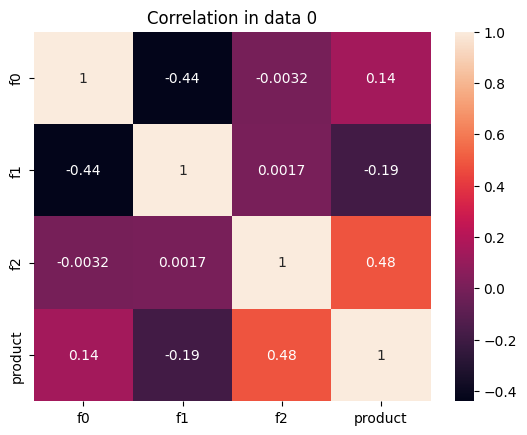

In [30]:
# Removed 'id' column from DataFrame
data_0_cleaned = data_0.drop(columns=['id'])

# Perform correlation calculations on a cleaned DataFrame
corr_0 = data_0_cleaned.corr()

# Displays a correlation heatmap
plt.title('Correlation in data 0')
sns.heatmap(corr_0, annot=True)
plt.show()

In [32]:
corr_0_rounded = corr_0.round(2)
corr_0_rounded

,f0,f1,f2,product
f0,1.00,-0.44,-0.00,0.14
f1,-0.44,1.00,0.00,-0.19
f2,-0.00,0.00,1.00,0.48
product,0.14,-0.19,0.48,1.00


**Conclusion:**

* The correlation analysis provides valuable insights into the relationships between the geological features ('f0', 'f1', 'f2') and the volume of reserves ('product'). While some features exhibit weak or no correlation, 'f2' stands out as being moderately correlated with the product, suggesting its importance in predicting the volume of reserves.
* These insights can guide further analysis and modeling efforts, helping prioritize certain features in predictive models for optimizing oil well selection for OilyGiant Mining Company. Additionally, understanding the relationships between features can aid in feature engineering and refinement of predictive algorithms to improve model accuracy and performance.

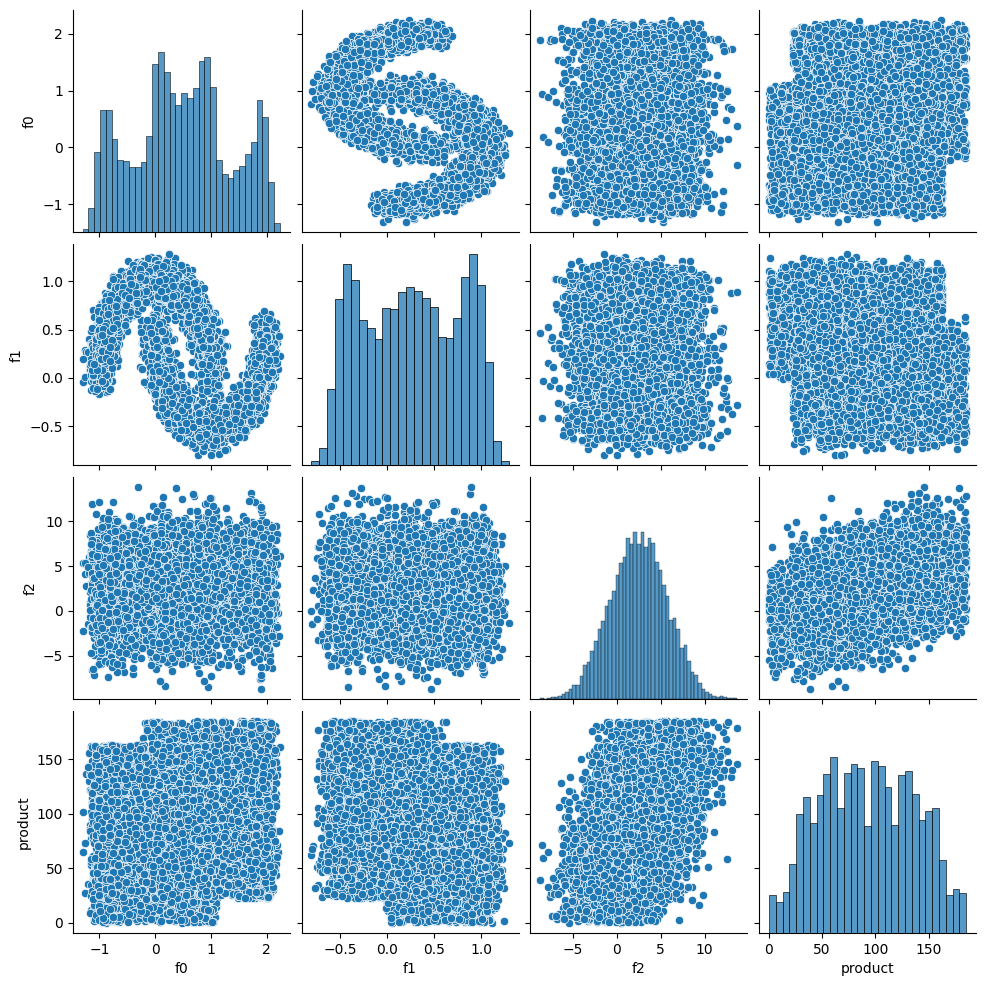

In [33]:
# Distribution of data from each feature
sns.pairplot(data_0[['f0', 'f1', 'f2', 'product']].sample(frac=0.1))
plt.show()

In [38]:
data_distribution_0 = data_0[['f0', 'f1', 'f2', 'product']].describe()
print("Distribution of data from each feature:")
data_distribution_0

Distribution of data from each feature:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


**Conclusion:**
* The visualization of feature distributions provides valuable insights into the spread and variability of data within each feature, aiding in understanding the characteristics of the dataset.
* These insights can inform further analysis and modeling efforts, guiding the selection of appropriate modeling techniques and feature engineering strategies to develop predictive models for optimizing oil well selection.
* Understanding the distribution of reserve volumes ('product') is particularly crucial for identifying potential patterns or trends that may influence oil well selection decisions and maximizing profitability for OilyGiant Mining Company.

### Data 1

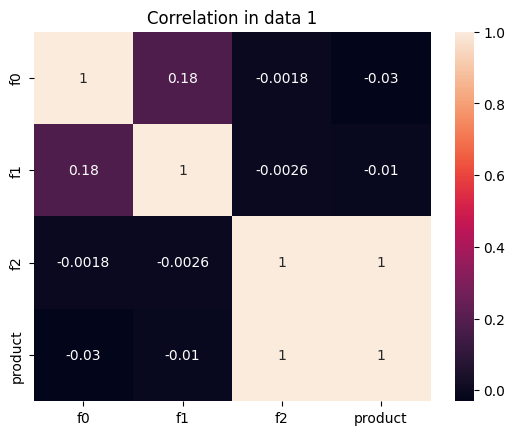

In [37]:
# Removed 'id' column from DataFrame
data_1_cleaned = data_1.drop(columns=['id'])

# Perform correlation calculations on a cleaned DataFrame
corr_1 = data_1_cleaned.corr()

# Displays a correlation heatmap
plt.title('Correlation in data 1')
sns.heatmap(corr_1, annot=True)
plt.show()

In [39]:
corr_1_rounded = corr_1.round(2)
corr_1_rounded

,f0,f1,f2,product
f0,1.00,0.18,-0.0,-0.03
f1,0.18,1.00,-0.0,-0.01
f2,-0.00,-0.00,1.0,1.00
product,-0.03,-0.01,1.0,1.00


**Conclusion:**
* The correlation analysis provides valuable insights into the relationships between the features ('f0', 'f1', 'f2') and the target variable ('product') in the dataset.
* While 'f0' and 'f1' exhibit weak correlations with the target variable, 'f2' stands out as being perfectly correlated with the target variable, indicating its importance in predicting reserve volumes.
* These insights can guide feature selection and modeling strategies, emphasizing the significance of 'f2' in predictive modeling for optimizing oil well selection. Further analysis and modeling efforts should prioritize the inclusion of 'f2' and explore its predictive power in maximizing profitability for OilyGiant Mining Company.

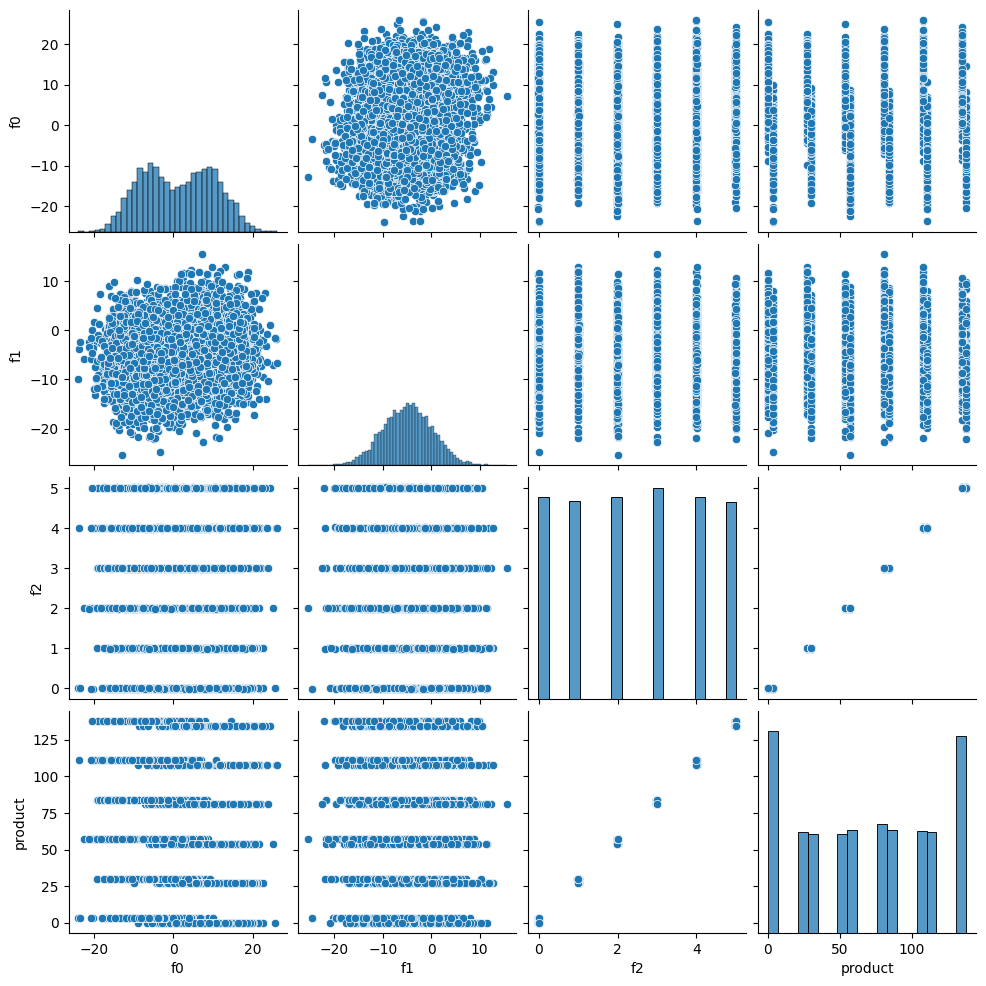

In [40]:
# Distribution of data from each feature
sns.pairplot(data_1[['f0', 'f1', 'f2', 'product']].sample(frac=0.1))
plt.show()

In [41]:
data_distribution_1 = data_1[['f0', 'f1', 'f2', 'product']].describe()
print("Distribution of data from each feature:")
data_distribution_1

Distribution of data from each feature:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


**Conclusion:**
* The visualization of feature distributions provides valuable insights into the spread and variability of data within each feature, aiding in understanding the characteristics of the dataset.
* These insights can inform further analysis and modeling efforts, guiding the selection of appropriate modeling techniques and feature engineering strategies to develop predictive models for optimizing oil well selection.
* Understanding the distribution of reserve volumes ('product') is particularly crucial for identifying potential patterns or trends that may influence oil well selection decisions and maximizing profitability for OilyGiant Mining Company.

### Data 2

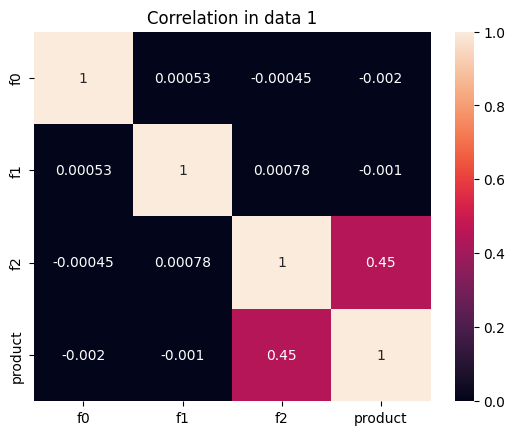

In [42]:
# Removed 'id' column from DataFrame
data_2_cleaned = data_2.drop(columns=['id'])

# Perform correlation calculations on a cleaned DataFrame
corr_2 = data_2_cleaned.corr()

# Displays a correlation heatmap
plt.title('Correlation in data 1')
sns.heatmap(corr_2, annot=True)
plt.show()

In [43]:
corr_2_rounded = corr_2.round(2)
corr_2_rounded

,f0,f1,f2,product
f0,1.0,0.0,-0.00,-0.00
f1,0.0,1.0,0.00,-0.00
f2,-0.0,0.0,1.00,0.45
product,-0.0,-0.0,0.45,1.00


**Conclusion:**
* The correlation analysis provides insights into the relationships between the features ('f0', 'f1', 'f2') and the target variable ('product') in the dataset.
* While 'f0', 'f1', and 'f2' exhibit no significant correlations with each other, 'f2' stands out as being moderately correlated with the target variable 'product'. This suggests that 'f2' may be a useful predictor for estimating reserve volumes.
* These insights can guide feature selection and modeling strategies, emphasizing the importance of 'f2' in predictive modeling for optimizing oil well selection. Further analysis and modeling efforts should explore the predictive power of 'f2' and its contribution to maximizing profitability for OilyGiant Mining Company.

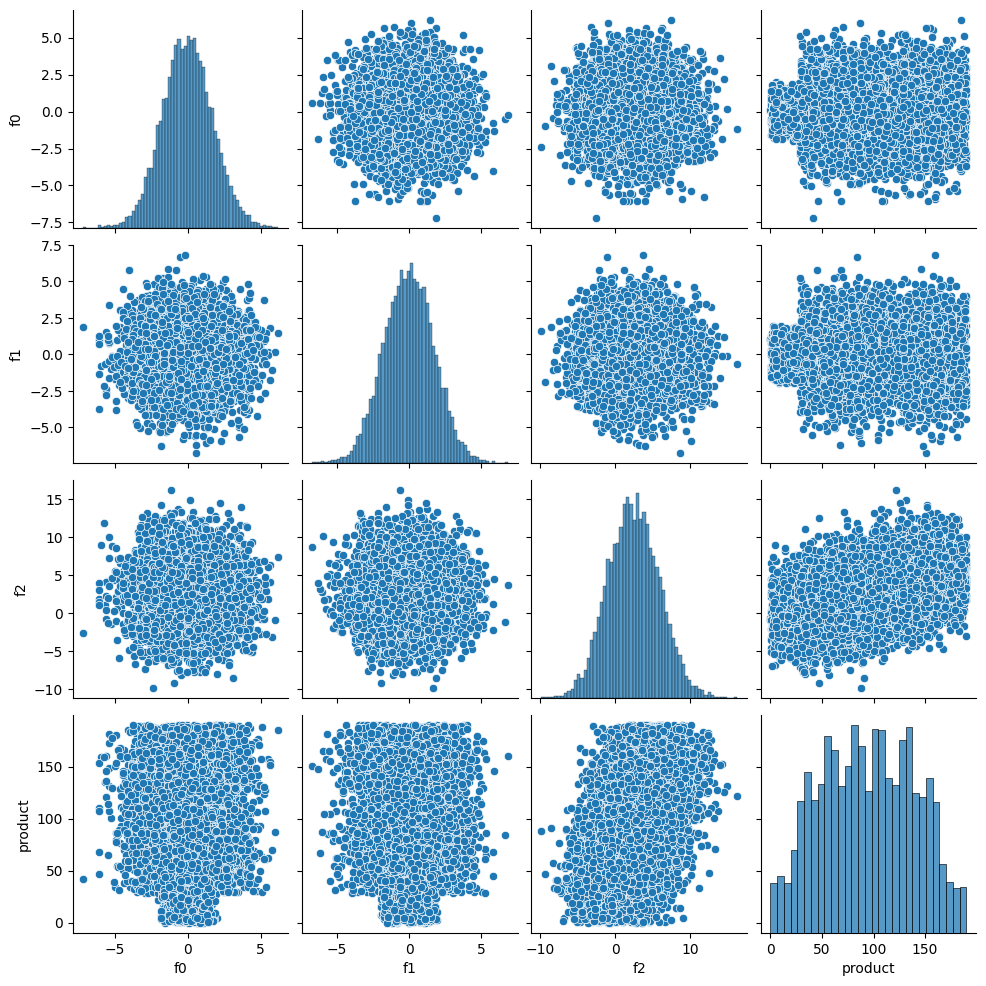

In [44]:
# Distribution of data from each feature
sns.pairplot(data_2[['f0', 'f1', 'f2', 'product']].sample(frac=0.1))
plt.show()

In [45]:
data_distribution_2 = data_2[['f0', 'f1', 'f2', 'product']].describe()
print("Distribution of data from each feature:")
data_distribution_2

Distribution of data from each feature:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**Conclusion:**
* The visualization of feature distributions provides valuable insights into the spread and variability of data within each feature, aiding in understanding the characteristics of the dataset.
* These insights can inform further analysis and modeling efforts, guiding the selection of appropriate modeling techniques and feature engineering strategies to develop predictive models for optimizing oil well selection.
* Understanding the distribution of reserve volumes ('product') is particularly crucial for identifying potential patterns or trends that may influence oil well selection decisions and maximizing profitability for OilyGiant Mining Company.

# 2.	Model Training and Validation

In [46]:
def mape(target_actual, target_predict):
    metric = pd.Series(abs(target_actual - target_predict) / target_actual).replace(np.inf, 0).mean() * 100
    return metric

In [49]:
def create_model(dataframe, data_ke):
    # Separate features and targets
    features = dataframe[['f0', 'f1', 'f2']]
    target = dataframe['product']

    # Train Test Split
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=10)

    # Train Model
    lr = LinearRegression()
    lr.fit(features_train, target_train)

    # Data Prediction
    target_pred_train = lr.predict(features_train)
    target_pred_test  = lr.predict(features_test)

    # Evaluation Metrics of Models
    rmse_train = np.sqrt(mean_squared_error(target_train, target_pred_train))
    rmse_test = np.sqrt(mean_squared_error(target_test, target_pred_test))

    # Print RMSE
    print('Data_', data_ke, '----------------------')
    print('RMSE Train   :', round(rmse_train, 2))
    print('RMSE Test    :', round(rmse_test, 2))
    # Print MAPE
    print('MAPE Train   :', round(mape(target_train, target_pred_train), 2), '%')
    print('MAPE Test    :', round(mape(target_test, target_pred_test), 2), '%')

    # Average predicted Oil Volume
    mean_volume = target_pred_test.mean()
    print('Oil Volume:', round(mean_volume, 2))

    result = pd.DataFrame({'actual': target_test, 'predict': target_pred_test})

    return result

In [50]:
# Predict data 0
result_0 = create_model(dataframe=data_0, data_ke=0)

# Predict data 1
result_1 = create_model(dataframe=data_1, data_ke=1)

# Predict data 2
result_2 = create_model(dataframe=data_2, data_ke=2)

Data_ 0 ----------------------
RMSE Train   : 37.64
RMSE Test    : 37.85
MAPE Train   : 147.33 %
MAPE Test    : 245.61 %
Oil Volume: 92.41
Data_ 1 ----------------------
RMSE Train   : 0.89
RMSE Test    : 0.89
MAPE Train   : 2.86 %
MAPE Test    : 2.82 %
Oil Volume: 68.83
Data_ 2 ----------------------
RMSE Train   : 40.06
RMSE Test    : 40.05
MAPE Train   : 200.68 %
MAPE Test    : 237.09 %
Oil Volume: 94.96


**Conclusion**

**Performance Metrics:**
  * The RMSE and MAPE values are essential metrics for evaluating the performance of the models. Lower RMSE and MAPE values indicate better model performance.
  * Data 1 shows the best performance with the lowest RMSE and MAPE values, indicating that the model trained on Data 1 has the best predictive accuracy among the three datasets.
  * Data 0 and Data 2 exhibit higher RMSE and MAPE values, suggesting lower predictive accuracy compared to Data 1.

**Average Predicted Oil Volume:**
  * The average predicted oil volume represents the average estimate of oil reserves made by the model for each dataset. It provides insight into the overall predicted volume of reserves.
  * Data 2 has the highest average predicted oil volume, followed by Data 0 and then Data 1.

**Insights:**
  * The differences in model performance and average predicted oil volume across the datasets could be attributed to variations in the geological features ('f0', 'f1', 'f2') and oil reserve characteristics present in each dataset.
  * Further analysis could focus on understanding the specific geological features that contribute most significantly to predicting oil reserve volumes and refining the modeling approach to improve predictive accuracy, particularly for datasets with higher RMSE and MAPE values.

# 3.	Profit Calculation Preparation

In [52]:
# Minimum Value for revenue and volume generated
budget      = 100000000
revenue  = 4500
oil_well    = 200
cost_oil_well  = budget / oil_well
min_barrel  = cost_oil_well / revenue
print('Minimum Income per Well       : $', round(cost_oil_well, 2))
print('Minimum volume of oil produced:', round(min_barrel, 2), ' thousand barrels')

Minimum Income per Well       : $ 500000.0
Minimum volume of oil produced: 111.11  thousand barrels


**Conclusion**

* These calculations provide critical insights into the minimum financial requirements and production targets necessary for each oil well to ensure profitability in the oil well development project.
* By adhering to these minimum thresholds, OilyGiant Mining Company can mitigate the risk of financial losses and optimize their oil well selection strategy to maximize profitability.

# 4.	Profit Calculation Function

In [53]:
def profit(dataframe):
    results = dataframe.sort_values(by='predict', ascending=False).head(200)
    point_volume = results['actual'].sum()
    profit = point_volume * revenue - budget
    return profit

In [54]:
# Best Case Scenario
profit_0 = profit(dataframe=result_0)
print('Profit Region 0: $', round(profit_0, 2))
print('------------------------------------')

profit_1 = profit(dataframe=result_1)
print('Profit Region 1: $', round(profit_1, 2))
print('------------------------------------')

profit_2 = profit(dataframe=result_2)
print('Profit Region 2: $', round(profit_2, 2))
print('------------------------------------')

Profit Region 0: $ 33878788.72
------------------------------------
Profit Region 1: $ 24150866.97
------------------------------------
Profit Region 2: $ 24318900.21
------------------------------------


**Conclusion**

* The profit estimates indicate the potential financial gain from selecting the top 200 oil wells in each region based on the model predictions.
* Region 0 shows the highest estimated profit, followed by Regions 2 and 1.
* These profit estimates serve as valuable insights for decision-making regarding oil well selection and investment allocation, allowing OilyGiant Mining Company to prioritize regions with higher profit potential and optimize their resource allocation strategy.

# 5.	Risk and Profit Analysis:

In [55]:
def bootstrap_profit(dataframe, bootstrap=1000):
    state = np.random.RandomState(10)

    list_profit = []
    for simulasi in range(bootstrap):
        sample = dataframe.sample(n=500, random_state=state)
        sample_profit = profit(sample)
        list_profit.append(sample_profit)

    return pd.Series(list_profit)

In [60]:
def business_calculations(data, test=1000):
    boot = bootstrap_profit(dataframe=data, bootstrap=test)
    confidence_inteval = 0.95
    alpha = 1 - confidence_inteval
    min = int(boot.quantile(alpha/2))
    max = int(boot.quantile(1-alpha/2))
    avg = int(boot.mean())
    risk = round((boot < 0).mean() * 100, 2)
    print(f'Range Confidence  : $({min}) - $({max})')
    print(f'Average Profit    : ${avg}')
    print(f'Risk of Loss      : {risk}%')

In [61]:
print('Result Region 0')
business_calculations(data=result_0)

print('Result Region 1')
business_calculations(data=result_1)

print('Result Region 2')
business_calculations(data=result_2)

Result Region 0
Range Confidence  : $(-1552973) - $(8872630)
Average Profit    : $3863187
Risk of Loss      : 7.9%
Result Region 1
Range Confidence  : $(688561) - $(8423017)
Average Profit    : $4704832
Risk of Loss      : 0.8%
Result Region 2
Range Confidence  : $(-1899006) - $(8774106)
Average Profit    : $3536168
Risk of Loss      : 9.8%


**Conclusion**

* The analysis provides insights into the profitability and risk associated with each region based on bootstrapping techniques.
* Region 1 shows the lowest risk of loss with only 0.8%, coupled with a substantial average profit.
* Despite Region 0 having a higher average profit, it carries a slightly higher risk of loss compared to Region 1.
* Region 2 exhibits a higher risk of loss at 9.8%, making it the riskiest among the three regions analyzed.
* These insights are crucial for decision-making, allowing OilyGiant Mining Company to balance potential profitability with associated risks and make informed choices regarding resource allocation and investment strategies.


# Conclusion

In summary, our analysis aimed to identify the most profitable region for the development of 200 new oil wells for OilyGiant Mining Company. Here's a structured overview of our findings and the next steps:

1. Data Preparation:
  * We gathered and preprocessed data from oil wells in three selected regions (Data 0, Data 1, Data 2).
2. Model Training and Validation:
  * Trained predictive models to estimate oil reserves for each region.
  * Evaluated model performance using RMSE and MAPE metrics.
  * Found that Data 1 exhibited the best performance with the lowest RMSE and MAPE values.
3. Profit Calculation Preparation:
  * Calculated the minimum income per well and the minimum volume of oil produced to avoid losses.
  * Determined that each oil well needs to generate a minimum income of $500,000 and produce approximately 111.11 thousand barrels of oil.
4. Profit Calculation Function:
  * Developed a function to calculate profits based on selected wells and model predictions.
  * Estimated profits for each region based on the best-case scenario.
5. Risk and Profit Analysis:
  * Utilized bootstrapping techniques to assess profit distribution and risk levels for each region.
  * Found that Region 1 had the lowest risk of loss (0.8%) and substantial average profit.

**General Conclusion:**
  * Our analysis revealed valuable insights into the profitability and risk associated with oil well development in each region.
  * Region 1 emerged as the most favorable choice due to its low risk of loss and significant average profit.
  * Moving forward, we recommend focusing efforts on further refining predictive models and conducting additional geological analysis to enhance predictive accuracy.
  * Additionally, ongoing monitoring and evaluation of oil well performance in Region 1 can provide valuable feedback for future decision-making and investment strategies.

Overall, our structured approach provides OilyGiant Mining Company with actionable insights to optimize their oil well selection strategy, mitigate risks, and maximize profitability in their operations.